### Name: Sudeep Mangalvedhekar
### Roll No: 33147
### Batch: K9

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn import metrics
%matplotlib inline 

In [2]:
df = pd.read_csv("./processed.cleveland.data", names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [4]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
num           5
dtype: int64

In [5]:
names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
for name in names:
    print(f"{name} = ", df[name].unique())
    print()

age =  [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]

sex =  [1. 0.]

cp =  [1. 4. 3. 2.]

trestbps =  [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]

chol =  [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240

In [6]:
df['ca'].mode()

0    0.0
dtype: object

In [7]:
df['ca'].loc[df['ca'] == '?'] = '0.0'
print(df['ca'].unique())
df['ca'] = df['ca'].astype(float)

['0.0' '3.0' '2.0' '1.0']


C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
df['thal'].mode()

0    3.0
dtype: object

In [9]:
df['thal'].loc[df['thal'] == '?'] = '3.0'
print(df['thal'].unique())
df['thal'] = df['thal'].astype(float)

['6.0' '3.0' '7.0']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [11]:
df['num'].loc[df['num'] > 1] = 1
df['num'].unique()

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


array([0, 1], dtype=int64)

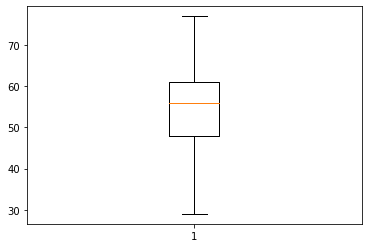

In [12]:
plt.boxplot(df['age']);

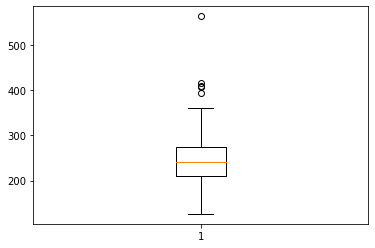

In [13]:
plt.boxplot(df['chol']);

In [14]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, : 13], df.iloc[:, 13], test_size = 0.3)
print(y_train.head())
print(y_train.shape)

133    0
78     0
272    1
164    0
180    1
Name: num, dtype: int64
(212,)


In [15]:
# x_train_scaled = preprocessing.StandardScaler().fit(x_train.T)
x_train_scaled = (x_train - x_train.mean()) / x_train.std()

In [21]:
# model = LogisticRegression().fit(x_train_scaled, y_train)
model = LogisticRegression().fit(x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.8791208791208791

In [24]:
# y_test_dim = np.reshape(np.array(y_test), (-1, 1))
# y_pred = model.predict(x_test)
# print(y_pred_dim.shape, y_test_dim.shape)
# y_pred_dim = np.reshape(np.array(y_pred), (-1, 1))

# model.score(y_pred_dim, y_test_dim)


In [18]:
tree = tree.DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred = tree.predict(x_test)

In [20]:
metrics.accuracy_score(y_test, y_pred)

0.7032967032967034